In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
if not os.path.exists('img/ch-5'):
    os.makedirs('img/ch-5', exist_ok=True)

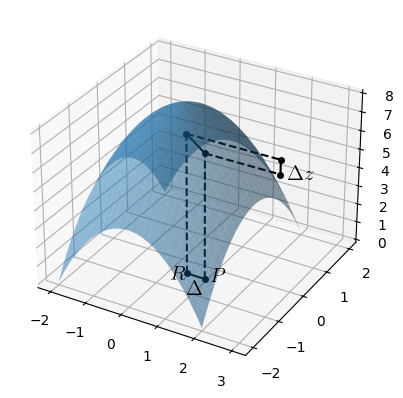

In [1]:

def f(x, y):
    return 8 - x**2 - y**2

ax = plt.figure().add_subplot(111, projection='3d')
x = np.linspace(-2, 2, 51)
y = np.linspace(-2, 2, 51)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

ax.plot_surface(xx, yy, zz, alpha=0.5)
p = [1, -.5]
u = [-1, 0]
eps = 0.5
r = [p[0] + eps*u[0], p[1] + eps*u[1]]
ax.plot([p[0], r[0]],
        [p[1], r[1]], 
        [0, 0], 
        'ko-', markersize=4)
ax.plot([p[0], r[0]],
        [p[1], r[1]], 
        [f(p[0], p[1]), f(r[0], r[1])], 
        'ko-', markersize=4)
ax.plot([3, 3], 
        [p[1], p[1]], 
        [f(p[0], p[1]), f(r[0], r[1])], 
        'ko-', markersize=4)
ax.plot([p[0], 3], 
        [p[1], p[1]], 
        [f(p[0], p[1]), f(p[0], p[1])], 
        'k--')
ax.plot([r[0], 3], 
        [r[1], r[1]], 
        [f(r[0], r[1]), f(r[0], r[1])], 
        'k--')
ax.plot([p[0], p[0]],
        [p[1], p[1]], 
        [0, f(p[0], p[1])],
        'k--')
ax.plot([r[0], r[0]],
        [r[1], r[1]], 
        [0, f(r[0], r[1])],
        'k--')

text_params = {
    'fontsize': 15,
    'horizontalalignment': 'center',
    'verticalalignment': 'center',
    'usetex': True,
}
ax.text(p[0]+.2, p[1]+.2, 0, r'$P$', **text_params)
ax.text(r[0]-.2, r[1]-.1, 0, r'$R$', **text_params)
ax.text(p[0], p[1]-.4, 0, r'$\Delta$', **text_params)
ax.text(3+.5, p[1], f(p[0], p[1])+.3, r'$\Delta z$', **text_params)
plt.savefig('img/ch-5/5111.png', dpi=600, bbox_inches='tight')

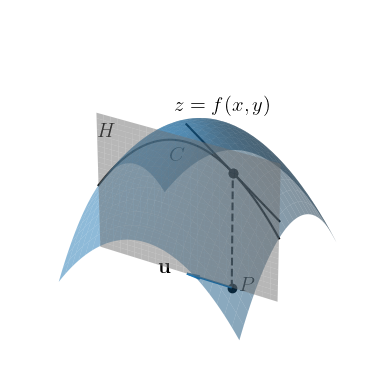

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return 8 - x**2 - y**2

p = [1, -.5]
u = [-1, 0]

ax = plt.figure().add_subplot(111, projection='3d')
x = np.linspace(-2, 2, 51)
y = np.linspace(-2, 2, 51)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)
ax.plot_surface(xx, yy, zz, alpha=0.5)

x = np.linspace(-2, 2, 51)
z = np.linspace(0, 8, 51)
xx, zz = np.meshgrid(x, z)
yy = np.ones_like(xx) * p[1]
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)

y = np.ones_like(x) * p[1]
z = f(x, y)
ax.plot(x, y, z, 'k')

eps = 1
t = np.linspace(p[0]+eps, p[0]-eps, 2)
y = np.ones_like(t) * p[1]
z = -2*(t-p[0]) + f(p[0], p[1])
ax.plot(t, y, z, 'k')

ax.plot(p[0], p[1], f(p[0], p[1]), 'ko')

ax.text(-1.8, p[1], f(p[0], p[1])+.3, r'$H$', fontsize=15, horizontalalignment='center', verticalalignment='center', usetex=True)
ax.text(-0.5, 0, 6, r'$C$', fontsize=15, horizontalalignment='center', verticalalignment='center', usetex=True)
ax.text(p[0], p[1]-.4, 11, r'$z = f(x,y)$', fontsize=15, horizontalalignment='center', verticalalignment='center', usetex=True)
ax.text(p[0]+.2, p[1]+.2, 0, r'$P$', fontsize=15, horizontalalignment='center', verticalalignment='center', usetex=True)
plt.plot([p[0], p[0]], [p[1], p[1]], [0, f(p[0], p[1])], 'ko--')
ax.quiver(p[0], p[1], 0, u[0], u[1], 0, color='C0')
ax.text(p[0]-1.5, p[1], 0, r'$\mathbf{u}$', fontsize=15, horizontalalignment='center', verticalalignment='center', usetex=True)

plt.axis('off')
plt.savefig('img/ch-5/5112.png', dpi=600, bbox_inches='tight')
# plt.show()

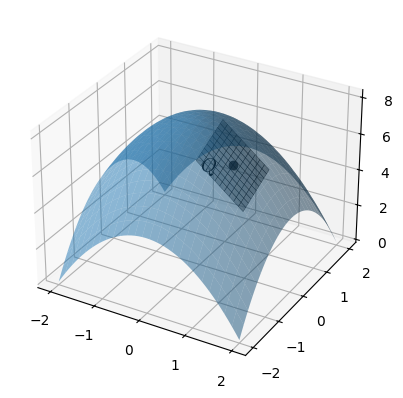

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return 8 - x**2 - y**2

p = np.array([1, -.5])
e = np.eye(2)

ax = plt.figure().add_subplot(111, projection='3d')
x = np.linspace(-2, 2, 51)
y = np.linspace(-2, 2, 51)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

ax.plot_surface(xx, yy, zz, alpha=0.5)

# ax.plot([-2, 2], [p[1], p[1]], [0, 0], 'k--')
# ax.plot([p[0], p[0]], [-2, 2], [0, 0], 'k--')
# ax.plot(p[0], p[1], 0, 'ko')

# t = np.linspace(-2, 2)
# ax.plot(t, p[1]*np.ones_like(t), f(t, p[1]), 'k')
# ax.plot(p[0]*np.ones_like(t), t, f(p[0], t), 'k')

quiver_params = {
    'color': 'C0',
    'arrow_length_ratio': 0.1,
}

def fx(x, y):
    return -2*x

def fy(x, y):
    return -2*y

def l(x,y):
    return fx(p[0], p[1])*(x-p[0]) + fy(p[0], p[1])*(y-p[1]) + f(p[0], p[1])

eps = 0.5
x = np.linspace(p[0]-eps, p[0]+eps, 11)
y = np.linspace(p[1]-eps, p[1]+eps, 11)
xx, yy = np.meshgrid(x, y)
ax.plot_surface(xx, yy, l(xx, yy), color='gray', lw=.2, edgecolor='k', alpha=.5)

ax.plot(p[0], p[1], f(p[0], p[1]), 'ko')
# ax.quiver(p[0], p[1], f(p[0], p[1]), 1, 0, fx(p[0], p[1]), **quiver_params)
# ax.quiver(p[0], p[1], f(p[0], p[1]), 0, 1, fy(p[0], p[1]), **quiver_params)

text_params = {
    'fontsize': 15, 
    'usetex': True,
}

# ax.text(1.6, 0, 0, r'$c_1(t)$', **text_params)
# ax.text(0, -2, 0, r'$c_2(t)$', **text_params)
# ax.text(-2, 0, 6, r'$d_1(t)$', **text_params)
# ax.text(.3, -2, 4, r'$d_2(t)$', **text_params)
# ax.text(p[0]-.1, p[1], .5, r'$P$', **text_params)
ax.text(p[0]-.4, p[1]-.5, f(p[0], p[1]), r'$Q$', **text_params)
# ax.text(p[0]+1, p[1], f(p[0], p[1])-1.2, r'$d_1^\prime(0)$', **text_params)
# ax.text(p[0], p[1]+.5, f(p[0], p[1])+2, r'$d_2^\prime(0)$', **text_params)

# plt.xlabel(r'$x$', **text_params)
# plt.ylabel(r'$y$', **text_params)
plt.savefig('img/ch-5/5132.png', dpi=600, bbox_inches='tight')

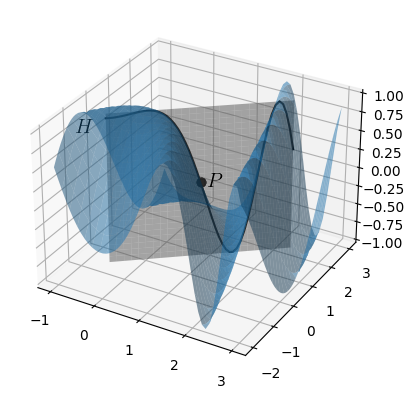

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.cos(x**2+y)

p = [np.sqrt(np.pi)/2, np.pi/4]
u = [1/np.sqrt(2), 1/np.sqrt(2)]

ax = plt.figure().add_subplot(111, projection='3d')
x = np.linspace(-1, 3, 51)
y = np.linspace(-2, 3, 51)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)
ax.plot_surface(xx, yy, zz, alpha=0.5)

t = np.linspace(-2, 2, 51)
z = np.linspace(-1, 1, 51)
tt, zz = np.meshgrid(t, z)
xx = p[0] + tt * u[0]
yy = p[1] + tt * u[1]
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)

z = f(p[0] + t*u[0], p[1] + t*u[1])
ax.plot(p[0] + t*u[0], p[1] + t*u[1], z, 'k')

# eps = 1
# t = np.linspace(p[0]+eps, p[0]-eps, 2)
# y = np.ones_like(t) * p[1]
# z = -2*(t-p[0]) + f(p[0], p[1])
# ax.plot(t, y, z, 'k')

ax.plot(p[0], p[1], f(p[0], p[1]), 'ko')

ax.text(-1.8, p[1], f(p[0], p[1])+.3, r'$H$', fontsize=15, horizontalalignment='center', verticalalignment='center', usetex=True)
ax.text(-0.5, 0, 6, r'$C$', fontsize=15, horizontalalignment='center', verticalalignment='center', usetex=True)
ax.text(p[0], p[1]-.4, 11, r'$z = f(x,y)$', fontsize=15, horizontalalignment='center', verticalalignment='center', usetex=True)
ax.text(p[0]+.2, p[1]+.2, 0, r'$P$', fontsize=15, horizontalalignment='center', verticalalignment='center', usetex=True)
plt.plot([p[0], p[0]], [p[1], p[1]], [0, f(p[0], p[1])], 'ko--')
# ax.quiver(p[0], p[1], 0, u[0], u[1], 0, color='C0')
# ax.text(p[0]-1.5, p[1], 0, r'$\mathbf{u}$', fontsize=15, horizontalalignment='center', verticalalignment='center', usetex=True)

# plt.axis('off')
plt.savefig('img/ch-5/5115.png', dpi=600, bbox_inches='tight')
# plt.show()

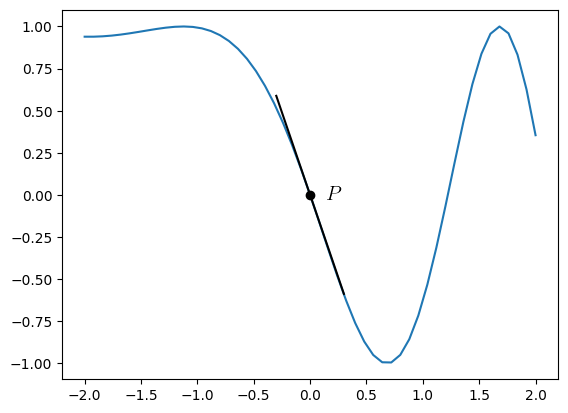

In [28]:

def f(x, y):
    return np.cos(x**2+y)

t = np.linspace(-2, 2, 51)

p = [np.sqrt(np.pi)/2, np.pi/4]
u = [1/np.sqrt(2), 1/np.sqrt(2)]


z = f(p[0] + t*u[0], p[1] + t*u[1])
plt.plot(t, z)
plt.plot(0, f(p[0], p[1]), 'ko')
plt.text(0.2, 0, r'$P$', fontsize=15, horizontalalignment='center', verticalalignment='center', usetex=True)
eps, slope = .3, -(np.sqrt(np.pi/2) + 1 /np.sqrt(2))
plt.plot([-eps, eps], [-slope*eps, slope*eps], 'k')
plt.savefig('img/ch-5/5116.png', dpi=600, bbox_inches='tight')

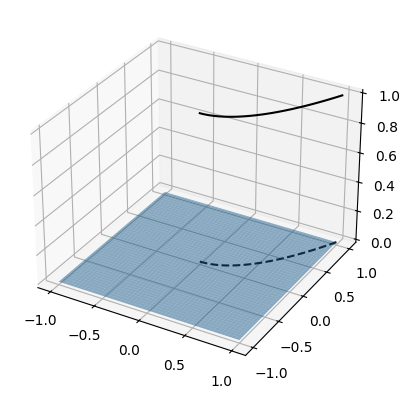

In [32]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-1, 1), np.linspace(-1, 1))
zz = np.zeros_like(xx)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
t = np.linspace(0, 1)
ax.plot(t, t**2, np.ones_like(t), 'k')
ax.plot(t, t**2, np.zeros_like(t), 'k--')
plt.savefig('img/ch-5/5211.png', dpi=600, bbox_inches='tight')

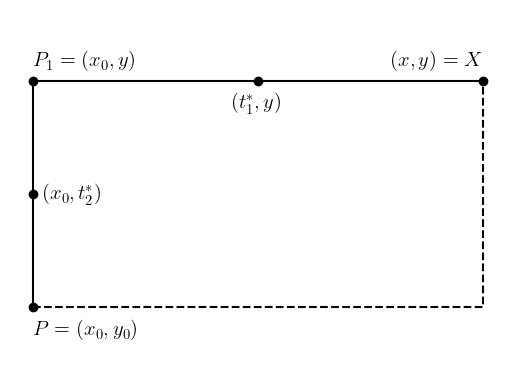

In [10]:
import numpy as np
import matplotlib.pyplot as plt

pt = np.array([[0, 0], [0, 2], [4, 2]])
plt.plot(*pt.T, 'ko-')
plt.plot([0, 4, 4], [0, 0, 2], 'k--')

plt.text(0, -.1, r'$P= (x_0,y_0)$', fontsize=15, ha='left', va='top', usetex=True)
plt.text(0, 2.1, r'$P_1 = (x_0, y)$', fontsize=15, ha='left', va='bottom', usetex=True)
plt.text(4, 2.1, r'$(x, y) = X$', fontsize=15, ha='right', va='bottom', usetex=True)

plt.plot(0, 1, 'ko')
plt.text(0.1, 1, r'$(x_0, t_2^*)$', fontsize=15, ha='left', va='center', usetex=True)
plt.plot(2, 2, 'ko')
plt.text(2, 1.9, r'$(t_1^*, y)$', fontsize=15, ha='center', va='top', usetex=True)
plt.axis('equal')
plt.axis('off')

plt.savefig('img/ch-5/5212.png', dpi=600, bbox_inches='tight')

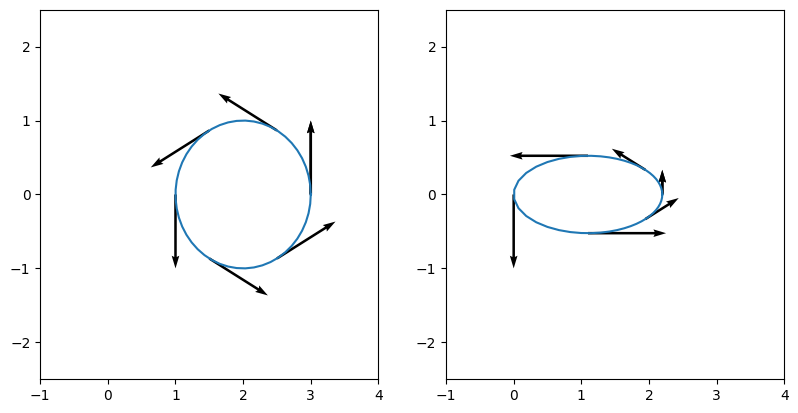

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def c(t):
    return np.array([np.cos(t) + 2, np.sin(t)])

def cp(t):
    return np.array([-np.sin(t), np.cos(t)])

def f(x, y):
    return np.array([np.log(x**2 + y**2), np.arctan2(y, x)])

def d(t):
    return f(c(t)[0], c(t)[1])

def dp(t):
    x, y = c(t)
    dx, dy = cp(t)
    a = np.array([[2*x/(x**2 + y**2), 2*y/(x**2 + y**2)],
                 [-y/(x**2 + y**2), x/(x**2 + y**2)]])
    return a @ np.array([dx, dy])

t = np.linspace(0, 2*np.pi)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(121)
ax.plot(c(t)[0], c(t)[1])
ax.set_xlim([-1, 4])
ax.set_ylim([-2.5, 2.5])

quiver_param = {
    'angles': 'xy',
    'scale_units': 'xy',
    'scale': 1,
    'color': 'k'
}

tr = np.linspace(0, 2*np.pi, 7)
for theta in tr:
    x, y = c(theta)
    dx, dy = cp(theta)
    ax.quiver(x, y, dx, dy, **quiver_param)

ax = fig.add_subplot(122)
ax.plot(d(t)[0], d(t)[1])
ax.set_xlim([-1, 4])
ax.set_ylim([-2.5, 2.5])

for theta in tr:
    x, y = d(theta)
    dx, dy = dp(theta)
    ax.quiver(x, y, dx, dy, **quiver_param)

plt.savefig('img/ch-5/5231.png', dpi=600, bbox_inches='tight')

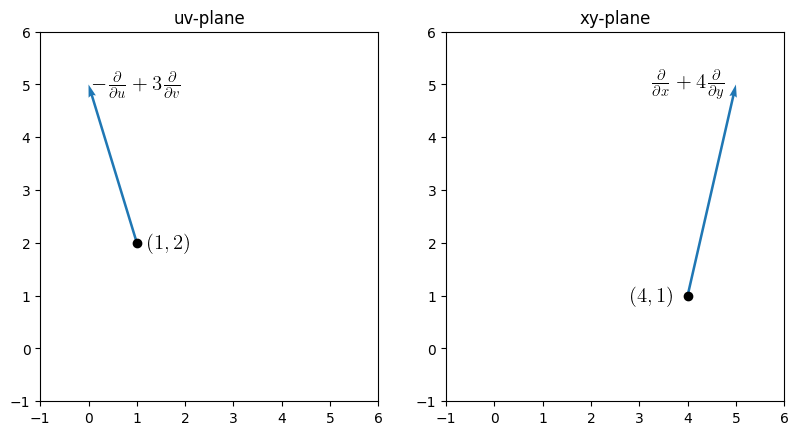

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=plt.figaspect(.5))

p = np.array([1, 2])
u = np.array([-1, 3])
a = np.array([[ 2 , 1],
              [-1 , 1]])
q = a @ p
v = a @ u

quiver_params = {
    'angles': 'xy',
    'scale_units': 'xy',
    'scale': 1,
}

text_params = {
    'fontsize': 15,
    'usetex': True,
    'va': 'center',
    'ha': 'center',
}

ax = fig.add_subplot(121)
ax.plot(p[0], p[1], 'ko')
ax.quiver(p[0], p[1], u[0], u[1], color='C0', **quiver_params)
ax.text(p[0]+.7, p[1], r'$(1, 2)$', **text_params)
ax.text(p[0], p[1]+3, r'$-\frac{\partial}{\partial u} + 3\frac{\partial}{\partial v}$', **text_params)
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_title('uv-plane')

ax = fig.add_subplot(122)
ax.plot(q[0], q[1], 'ko')
ax.quiver(q[0], q[1], v[0], v[1], color='C0', **quiver_params)
ax.text(q[0]-.7, q[1], r'$(4, 1)$', **text_params)
ax.text(q[0], q[1]+4, r'$\frac{\partial}{\partial x} + 4\frac{\partial}{\partial y}$', **text_params)
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_title('xy-plane')

plt.savefig('img/ch-5/5311.png', dpi=600, bbox_inches='tight')

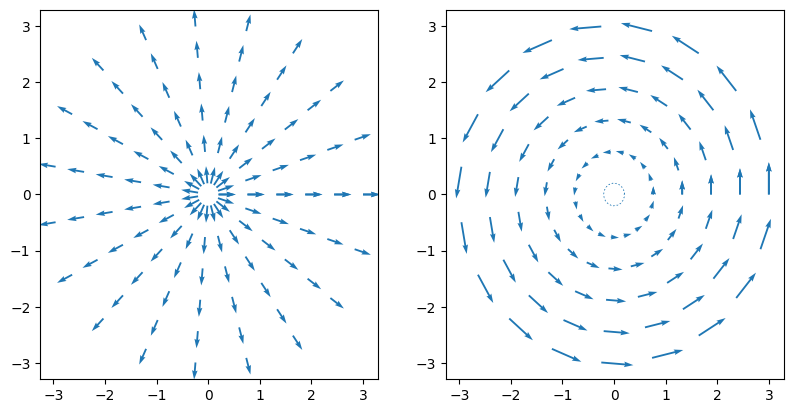

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.5))
rr, tt = np.meshgrid(np.linspace(.2, 3, 6), np.linspace(-2*np.pi, 2*np.pi, 20))
ax = fig.add_subplot(121)
ax.quiver(rr*np.cos(tt), rr*np.sin(tt), np.cos(tt), np.sin(tt), color='C0')
ax = fig.add_subplot(122)
ax.quiver(rr*np.cos(tt), rr*np.sin(tt), -rr*np.sin(tt), rr*np.cos(tt), color='C0')

plt.savefig('img/ch-5/5312.png', dpi=600, bbox_inches='tight')

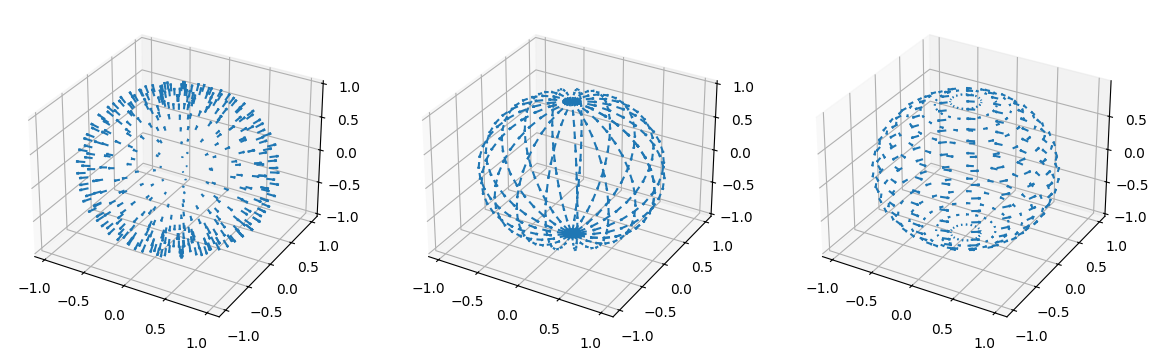

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tt, pp = np.meshgrid(np.linspace(0, np.pi, 20), np.linspace(0, 2*np.pi, 20))
xx, yy, zz = np.sin(tt)*np.cos(pp), np.sin(tt)*np.sin(pp), np.cos(tt)
fig = plt.figure(figsize=plt.figaspect(1/3))
ax = fig.add_subplot(131, projection='3d')
quiver_param = {
    'length': .1,
    'arrow_length_ratio': .3,
}
ax.quiver(xx, yy, zz, 
          np.sin(tt)*np.cos(pp), np.sin(tt)*np.sin(pp), np.cos(tt), **quiver_param)
ax = fig.add_subplot(132, projection='3d')
ax.quiver(xx, yy, zz,
          np.cos(tt)*np.cos(pp), np.cos(tt)*np.sin(pp), -np.sin(tt), **quiver_param)
ax = fig.add_subplot(133, projection='3d')
ax.quiver(xx, yy, zz, -np.sin(tt)*np.sin(pp), np.sin(tt)*np.cos(pp), 0, **quiver_param)

plt.savefig('img/ch-5/5313.png', dpi=600, bbox_inches='tight')

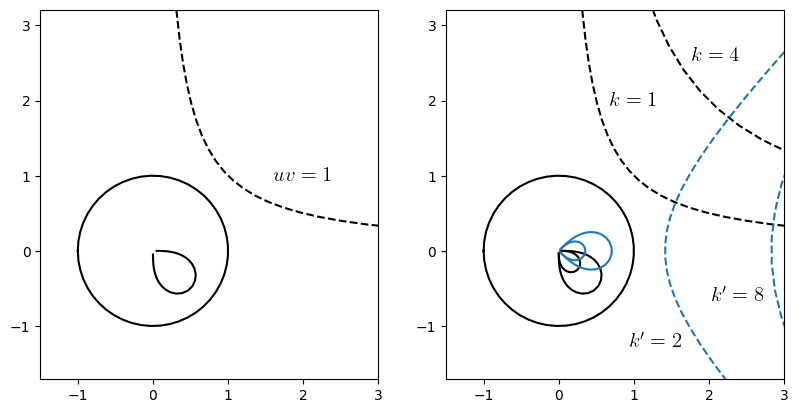

In [46]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=plt.figaspect(.5))

t = np.linspace(-1, 1)
c = lambda t: np.array([np.exp(t), np.exp(-t)])
transf = lambda p: np.array([p[0]/(p[0]**2 + p[1]**2), -p[1]/(p[0]**2 + p[1]**2)])
d = lambda t: transf(c(t))

ax = fig.add_subplot(121)

ax.plot(c(3*t)[0], c(3*t)[1], 'k--')
ax.plot(d(3*t)[0], d(3*t)[1], 'k')
ax.plot(np.cos(np.pi*t), np.sin(np.pi*t), 'k')

ax.axis('equal')
ax.set_xlim([-1.5, 3])
ax.set_ylim([-1.5, 3])

text_param = {
    'fontsize': 15,
    'verticalalignment': 'center',
    'horizontalalignment': 'center',
    'usetex': True,
}

ax.text(2, 1, r'$uv=1$', **text_param)

ax = fig.add_subplot(122)

ax.plot(np.cos(np.pi*t), np.sin(np.pi*t), 'k')

for i in [1, 2]:
    ax.plot(i*c(3*t)[0], i*c(3*t)[1], 'k--')
    d = lambda t: transf(i*c(t))
    ax.plot(d(3*t)[0], d(3*t)[1], 'k')

text_param = {
    'fontsize': 15,
    'verticalalignment': 'center',
    'horizontalalignment': 'center',
    'usetex': True,
}
ax.text(1, 2, r'$k=1$', **text_param)
ax.text(2.1, 2.6, r'$k=4$', **text_param)

c = lambda t: np.array([np.cosh(t), np.sinh(-t)])
transf = lambda p: np.array([p[0]/(p[0]**2 + p[1]**2), -p[1]/(p[0]**2 + p[1]**2)])
d = lambda t: transf(c(t))


for i in [np.sqrt(2), 2*np.sqrt(2)]:
    ax.plot(i*c(3*t)[0], i*c(3*t)[1], '--', color='C0')
    d = lambda t: transf(i*c(t))
    ax.plot(d(3*t)[0], d(3*t)[1], color='C0')

ax.text(1.3, -1.2, r'$k^\prime=2$', **text_param)
ax.text(2.4, -.6, r'$k^\prime=8$', **text_param)

ax.axis('equal')
ax.set_xlim([-1.5, 3])
ax.set_ylim([-1.5, 3])

plt.savefig('img/ch-5/5324.png', dpi=600, bbox_inches='tight')

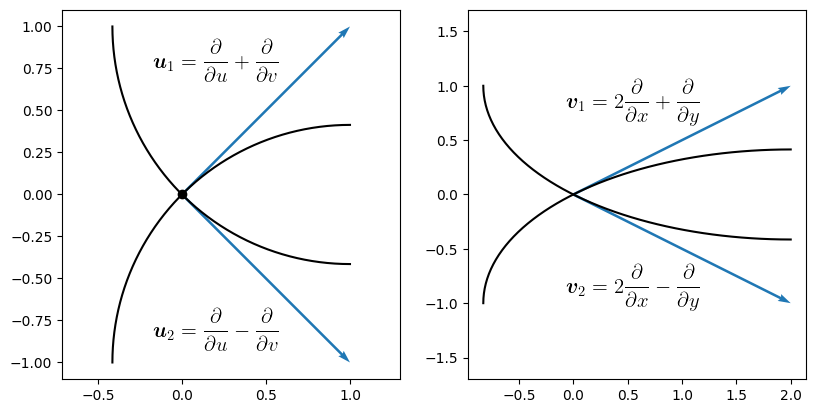

In [65]:
import numpy as np
import matplotlib.pyplot as plt

quiver_param = {
    'scale': 1,
    'scale_units': 'xy',
    'angles': 'xy',
}

text_param = {
    'fontsize': 15,
    'verticalalignment': 'center',
    'horizontalalignment': 'center',
    'usetex': True,
}

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(121)

ax.plot(0, 0, 'ko')

t = np.linspace(np.pi, np.pi/2)
x = np.sqrt(2)*np.cos(t) + 1
y = np.sqrt(2)*np.sin(t) - 1
ax.plot(x, y, 'k')
ax.quiver(0, 0, 1, 1, color='C0', **quiver_param)

t = np.linspace(3*np.pi/2, np.pi)
x = np.sqrt(2)*np.cos(t) + 1
y = np.sqrt(2)*np.sin(t) + 1
ax.plot(x, y, 'k')
ax.quiver(0, 0, 1, -1, color='C0', **quiver_param)

ax.axis('equal')
ax.text(.2, .8, 
        r'{\boldmath$u$}${}_1 = \displaystyle\frac{\partial}{\partial u} + \frac{\partial}{\partial v}$',
        **text_param)
ax.text(.2, -.8,
        r'{\boldmath$u$}${}_2 = \displaystyle\frac{\partial}{\partial u} - \frac{\partial}{\partial v}$',
        **text_param)

ax = fig.add_subplot(122)

t = np.linspace(np.pi, np.pi/2)
x = 2*np.sqrt(2)*np.cos(t) + 2
y = np.sqrt(2)*np.sin(t) - 1
ax.plot(x, y, 'k')
ax.quiver(0, 0, 2, 1, color='C0', **quiver_param)

t = np.linspace(3*np.pi/2, np.pi)
x = 2*np.sqrt(2)*np.cos(t) + 2
y = np.sqrt(2)*np.sin(t) + 1
ax.plot(x, y, 'k')
ax.quiver(0, 0, 2, -1, color='C0', **quiver_param)

ax.axis('equal')
ax.text(.55, .85, 
        r'{\boldmath $v$}${}_1 =2\displaystyle\frac{\partial}{\partial x} + \frac{\partial}{\partial y}$',
        **text_param)
ax.text(0.55, -.85,
        r'{\boldmath $v$}${}_2 =2\displaystyle\frac{\partial}{\partial x} - \frac{\partial}{\partial y}$',
        **text_param)

plt.savefig('img/ch-5/5315.png', dpi=600, bbox_inches='tight')

C:\Users\hyosa\AppData\Local\Temp\ipykernel_21836\985466465.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(t, y*np.ones_like(t), 'k--', color='C0')
C:\Users\hyosa\AppData\Local\Temp\ipykernel_21836\985466465.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(*f(t, y*np.ones_like(t)), 'k--', color='C0')


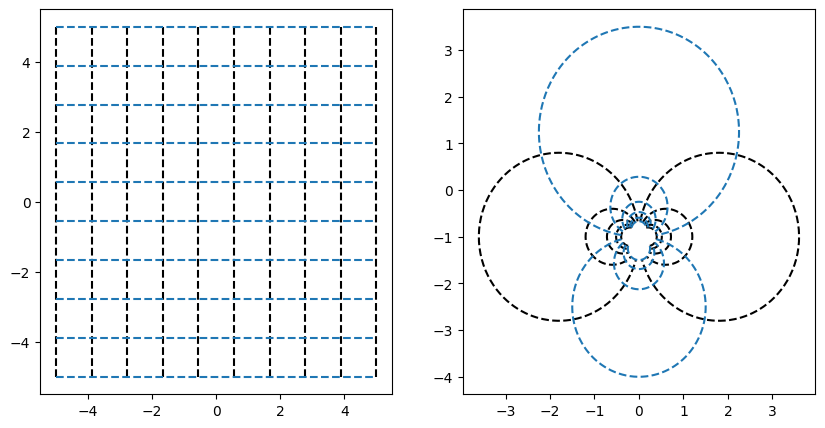

In [8]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda u, v: np.array([2*u/(u**2 + (1-v)**2), (1-u**2 -v**2)/(u**2 + (1-v)**2)])
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

t = np.linspace(-5, 5, 1000)
for x in np.linspace(-5, 5, 10):
    ax[0].plot(x*np.ones_like(t), t, 'k--')
    ax[1].plot(*f(x*np.ones_like(t), t), 'k--')

for y in np.linspace(-5, 5, 10):
    ax[0].plot(t, y*np.ones_like(t), 'k--', color='C0')
    ax[1].plot(*f(t, y*np.ones_like(t)), 'k--', color='C0')

plt.savefig('img/ch-5/5316.png', dpi=600, bbox_inches='tight') 

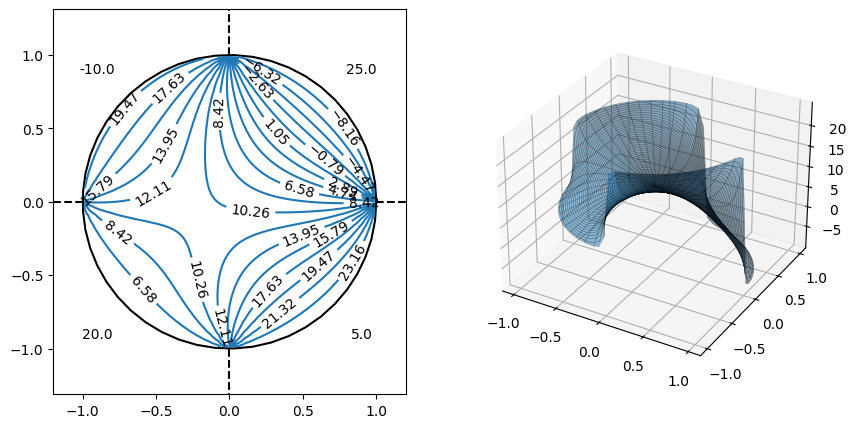

In [19]:
import numpy as np
import matplotlib.pyplot as plt

d2h = lambda u, v: np.array([2*u/(u**2+(1-v)**2),(1-u**2-v**2)/(u**2+(1-v)**2)])

def h(x,y,c): 
    t1 = np.arccos((x-1)/np.sqrt((x-1)**2+y**2))
    t2 = np.arccos(x/np.sqrt(x**2+y**2))
    t3 = np.arccos((x+1)/np.sqrt((x+1)**2+y**2))
    return c[0] + (c[3]-c[0])/np.pi*t1 + (c[2]-c[3])/np.pi*t2 + (c[1]-c[2])/np.pi*t3

def k(x,y,c):
    r1 = np.sqrt((x-1)**2+y**2)
    r2 = np.sqrt(x**2+y**2)
    r3 = np.sqrt((x+1)**2+y**2)
    return (c[3]-c[0])/np.pi*np.log(r1) + (c[2]-c[3])/np.pi*np.log(r2) + (c[1]-c[2])/np.pi*np.log(r3)

C = np.array([-10,20,5,25])

def d(u,v):
    xy = d2h(u, v)
    return h(xy[0], xy[1], C)

rr, tt = np.meshgrid(np.linspace(.01,.99,200), np.linspace(0,2*np.pi,100))
uu, vv = rr*np.cos(tt), rr*np.sin(tt)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

t = np.linspace(0, 2*np.pi)
ax[0].plot(np.cos(t), np.sin(t), 'k')
ax[0].axis('equal')
ax[0].set_xlim(-1.2, 1.2)
ax[0].set_ylim(-1.2, 1.2)

cs = ax[0].contour(uu, vv, d(uu, vv), 
                 levels=np.linspace(-10, 25, 20), 
                 linestyles='-',
                 colors='C0')
ax[0].clabel(cs, cs.levels, inline=True, colors='k')

text_params = {
    'ha': 'center',
    'va': 'center',
}

off = .9
ax[0].text(-off, off, f'{C[0]:.1f}', **text_params)
ax[0].text(-off, -off, f'{C[1]:.1f}', **text_params)
ax[0].text(off, -off, f'{C[2]:.1f}', **text_params)
ax[0].text(off, off, f'{C[3]:.1f}', **text_params)

ax[0].plot([1, 1.5], [0, 0], 'k--')
ax[0].plot([-1, -1.5], [0, 0], 'k--')
ax[0].plot([0, 0], [1, 1.5], 'k--')
ax[0].plot([0, 0], [-1, -1.5], 'k--')

ax[1].axis('off')
ax[1] = fig.add_subplot(1, 2, 2, projection='3d')
ax[1].plot_surface(uu, vv, d(uu, vv), alpha=.5, edgecolor='k', lw=.2)

plt.savefig('img/ch-5/5331.png', dpi=600, bbox_inches='tight')

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def theta(x, y):
    return np.arccos(x/np.sqrt(x**2+y**2))

def h(x,y,c): 
    t = c[0] + (c[3]-c[0])/np.pi*theta(x-1, y)
    t += (c[2]-c[3])/np.pi*theta(x, y)
    t += (c[1]-c[2])/np.pi*theta(x+1, y)
    return t

In [68]:
def T(u, v):
    return np.array([2*u/(u**2+(1-v)**2),
                     (1-u**2-v**2)/(u**2+(1-v)**2)])

def H(u, v, c):
    return h(*T(u, v), c)

In [72]:
def radius(x, y):
    return np.sqrt(x**2 + y**2)

def phi(x, y, c):
    r = (c[3]-c[0])/np.pi*np.log(radius(x-1, y))
    r += (c[2]-c[3])/np.pi*np.log(radius(x, y))
    r += (c[1]-c[2])/np.pi*np.log(radius(x+1, y))
    return r

def Phi(u, v, c):
    return phi(*T(u, v), c)

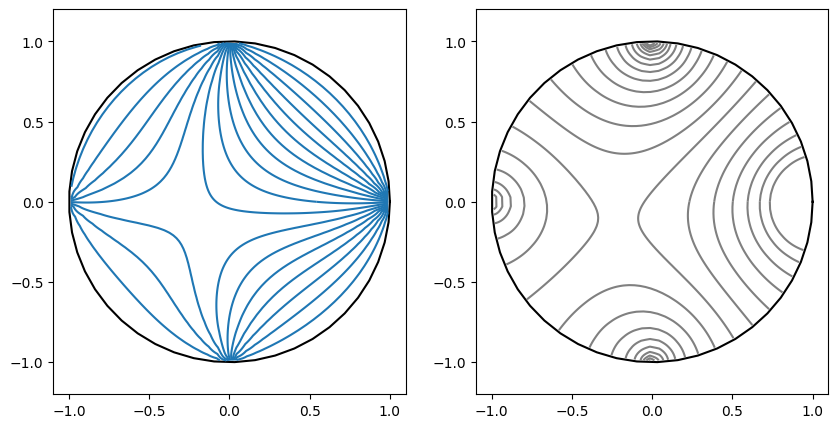

In [75]:
c = np.array([-10,20,5,25])

rr, tt = np.meshgrid(np.linspace(.01,.99,200), np.linspace(0,2*np.pi,100))
uu, vv = rr*np.cos(tt), rr*np.sin(tt)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

t = np.linspace(0, 2*np.pi)
for i in range(2):
    ax[i].plot(np.cos(t), np.sin(t), 'k')
    ax[i].axis('equal')
    ax[i].set_xlim(-1.2, 1.2)
    ax[i].set_ylim(-1.2, 1.2)

ax[0].contour(uu, vv, H(uu, vv, c), 
                levels=np.linspace(-10, 25, 20), 
                linestyles='-',
                colors='C0')

ax[1].contour(uu, vv, Phi(uu, vv, c),
                levels=np.linspace(-10, 40, 20), 
                linestyles='-',
                colors='gray')

plt.savefig('img/ch-5/5332.png', dpi=600, bbox_inches='tight')


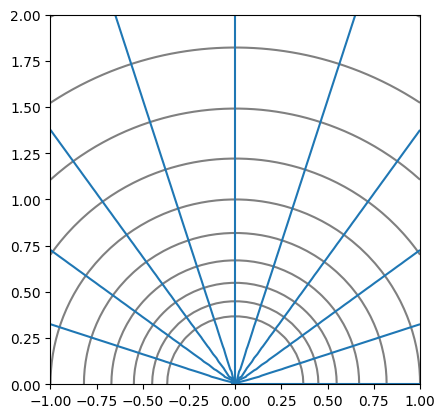

In [55]:
xx, yy = np.meshgrid(np.linspace(-1, 1), np.linspace(0, 2))
a = lambda x, y: np.log(np.sqrt(x**2 + y**2))
b = lambda x, y: np.arccos(x/np.sqrt(x**2 + y**2))
fig, ax = plt.subplots(subplot_kw={'aspect': 1})
ax.contour(xx, yy, a(xx, yy), levels=np.linspace(-1, 1, 11), colors='gray', linestyles='-')
ax.contour(xx, yy, b(xx, yy), levels=np.linspace(0, np.pi, 11), colors='C0', linestyles='-')
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)
ax.set_aspect("equal")
plt.savefig('img/ch-5/5333.png', dpi=600, bbox_inches='tight')

C:\Users\hyosa\AppData\Local\Temp\ipykernel_21836\2172462588.py:4: RuntimeWarning: invalid value encountered in divide
  t1 = np.arccos((x-1)/np.sqrt((x-1)**2+y**2))
C:\Users\hyosa\AppData\Local\Temp\ipykernel_21836\2172462588.py:9: RuntimeWarning: divide by zero encountered in log
  r1 = np.log(np.sqrt((x-1)**2+y**2))


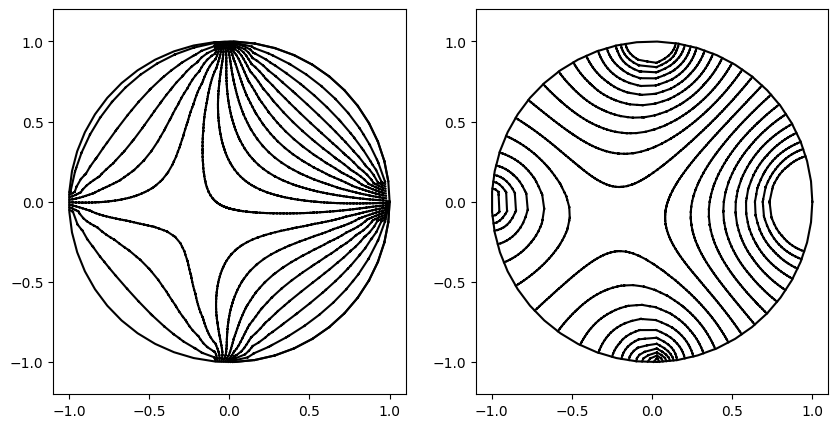

In [61]:
C = np.array([-10, 20, 5, 25])
d2h = lambda u, v: np.array([2*u/(u**2+(1-v)**2),(1-u**2-v**2)/(u**2+(1-v)**2)])
def h(x,y): 
    t1 = np.arccos((x-1)/np.sqrt((x-1)**2+y**2))
    t2 = np.arccos(x/np.sqrt(x**2+y**2))
    t3 = np.arccos((x+1)/np.sqrt((x+1)**2+y**2))
    return C[0] + (C[3]-C[0])/np.pi*t1 + (C[2]-C[3])/np.pi*t2 + (C[1]-C[2])/np.pi*t3
def phi(x,y):
    r1 = np.log(np.sqrt((x-1)**2+y**2))
    r2 = np.log(np.sqrt(x**2+y**2))
    r3 = np.log(np.sqrt((x+1)**2+y**2))
    return (C[3]-C[0])/np.pi*r1 + (C[2]-C[3])/np.pi*r2 + (C[1]-C[2])/np.pi*r3

import contour 

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
for i in range(2):
    ax[i].plot(np.cos(np.linspace(0, 2*np.pi)), np.sin(np.linspace(0, 2*np.pi)), 'k')
    ax[i].axis('equal')
lvs = np.linspace(-10, 25, 20)
rr, tt = np.meshgrid(np.linspace(0, 1), np.linspace(0, 2*np.pi))
xx, yy = rr*np.cos(tt), rr*np.sin(tt)
for lv in lvs:
    cs = contour.Contour2D(np.array([xx, yy, h(*d2h(xx, yy))]), lv)
    ax[0].plot(*cs.T, 'k')
for lv in lvs:
    cs = contour.Contour2D(np.array([xx, yy, phi(*d2h(xx, yy))]), lv)
    ax[1].plot(*cs.T, 'k')

plt.savefig('img/ch-5/5334.png', dpi=600, bbox_inches='tight')